<a href="https://colab.research.google.com/github/swilsonmfc/automl/blob/main/GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm

# Install

In [1]:
!pip install gplearn

     |████████████████████████████████| 51kB 4.4MB/s 


In [2]:
!pip install drawdata

     |████████████████████████████████| 788kB 25.4MB/s 
     |████████████████████████████████| 368kB 38.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.23.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


# Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from drawdata import draw_scatter
import graphviz

from gplearn.genetic import SymbolicClassifier

# Algorithm

![](https://aqibsaeed.github.io/img/ga.png)

## Crossover

![](https://d3i71xaburhd42.cloudfront.net/73a50124700c7b2e44e3a72a298f6279a8b54ac3/13-Figure2-1.png)

## Mutate

![](https://www.researchgate.net/profile/Chun-Liu-8/publication/272093243/figure/fig8/AS:329956690284546@1455679213204/Mutation-operators-applied-to-chromosomes-in-the-proposed-genetic-algorithm.png)

# DIY

In [4]:
COEFFICIENTS =  [3.0, -2.0, 7.5, -10.0, 0.5, 4.4, 1.1, -0.75]

In [5]:
def calculate_fitness(population):
    """
    Compute the fitness / scoring function
    Implemented as the weighted sum with an array of coefficients
    """
    fitness = np.sum(population * COEFFICIENTS, axis=1)
    return fitness

def create_mating_pool(population, fitness, number_parents):
    """
    Find the best number_parents in population according to fitness
    """
    parents = np.empty((number_parents, population.shape[1]))
    for parent in range(number_parents):
        maximum = np.where(fitness == np.max(fitness))
        maximum = maximum[0][0]
        parents[parent, :] = population[maximum, :]
        fitness[maximum] = -999999
    return parents

def crossover(parents, number_offspring, features):
    """
    We're going to cross over parents to make offspring
    Our cross point will be halfway over feastures length
    """
    offspring = np.empty((number_offspring, features))
    cross = int(features / 2)
    for off in range(number_offspring):
        parent1 = off % parents.shape[0]
        parent2 = (off + 1) % parents.shape[0]
        offspring[off, 0:cross] = parents[parent1, 0:cross]
        offspring[off, cross:]  = parents[parent2, cross:]
    return offspring

def mutation(offspring):
    """
    Randomly select a feature to mutate
    """
    for off in range(offspring.shape[0]):
        rand = np.random.uniform(-1.0, 1.0, 1)
        mutate = np.random.randint(0, 7)
        offspring[off, mutate] = offspring[off, mutate] + rand
    return offspring

## Initialize Population
* 10 individuals in the population
* 8 features per individual

In [6]:
individuals = 10
features    = 8
pop_size = (individuals, features)
population = np.random.uniform(low=-5.0, high=5.0, size=pop_size)
pd.DataFrame(population)

,0,1,2,3,4,5,6,7
0,-3.435779,-1.612324,-0.767411,-4.565266,-3.480324,-1.373309,-1.881708,-3.670152
1,1.986107,-0.971786,-4.698268,1.564033,0.186146,2.836693,2.761240,-0.985578
2,-0.657648,2.225086,3.919493,-0.863649,-0.880978,2.049661,3.066881,-1.745847
3,1.704171,1.230175,-4.722394,-2.125237,-3.146305,-4.165887,-0.612767,-1.801953
4,-1.746265,3.711440,-1.929599,-4.301638,3.827924,-4.942098,-2.133024,3.708222
5,1.156902,4.482264,0.764544,-4.259451,0.148317,-4.791760,0.835161,1.680098
6,-1.694986,-1.757291,2.980538,4.926187,3.932371,-4.565220,2.202252,4.956588
7,-3.206661,-2.081767,4.263044,4.631670,-2.854211,-4.848206,1.666600,1.790950
8,-2.964198,0.955144,-4.013323,2.128461,4.971977,-2.890647,-1.962508,0.330423
9,-0.963567,2.847003,-2.636485,4.710868,-1.799248,-2.837786,-2.922128,0.845816


In [7]:
COEFFICIENTS

[3.0, -2.0, 7.5, -10.0, 0.5, 4.4, 1.1, -0.75]

## Initial Fitness
* Take our population and compute the original fitness

In [8]:
fitness = calculate_fitness(population)
print(pd.DataFrame(fitness))

           0
0  25.714403
1 -26.624379
2  44.870543
3 -30.739059
4  -9.076049
5  21.483780
6 -47.893955
7 -42.069480
8 -74.826856
9 -92.701603


## Run Generations
* For each generation we:
 * Compute the fitness
 * Pick best parents 
 * Make a number of offspring from parents using crossover
 * Randomly mutate the offspring
 * Concat the best parents and offspring
* Keep best individual and fitness eah time

In [9]:
generations = 20
mating      = 4
best_fitness = []
best_individual = []

for gen in range(generations):
    fitness = calculate_fitness(population)
    parents = create_mating_pool(population, fitness, mating)
    number_offspring = population.shape[0] - parents.shape[0]
    offspring = crossover(parents, number_offspring, features)
    offspring = mutation(offspring)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :]  = offspring
    
    best_fitness.append(max(calculate_fitness(population)))
    best_individual.extend(population[np.where(fitness == np.max(fitness))])

## Best Fitness

[44.870542781654464,
 50.0026517588708,
 54.860824014927246,
 56.26445621932548,
 62.13306409387036,
 70.97087307967158,
 71.99849952663301,
 76.35727737146263,
 82.95039413906159,
 88.1806591590288,
 89.04678808286579,
 89.52415327341235,
 95.05510918303062,
 95.05510918303062,
 95.31741034614623,
 95.31741034614623,
 98.85208356097675,
 103.88852570098358,
 104.18039770998138,
 109.4775760716155]

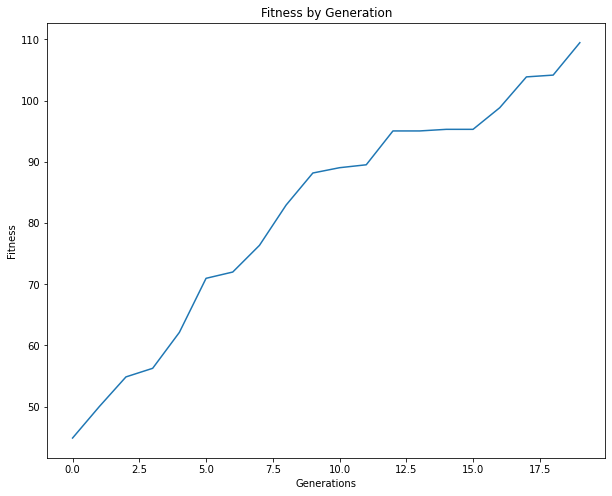

In [10]:
plt.figure(figsize=(10,8))
plt.plot(best_fitness)
plt.title('Fitness by Generation')
plt.xlabel('Generations')
plt.ylabel('Fitness')
best_fitness

## Best Offspring

In [11]:
pd.DataFrame(best_individual)

,0,1,2,3,4,5,6,7
0,-3.435779,-1.612324,-0.767411,-4.565266,-3.480324,-1.373309,-1.881708,-3.670152
1,-0.657648,1.675945,3.919493,-0.863649,-0.880978,2.966439,3.066881,-1.745847
2,-0.657648,1.831705,3.919493,-0.863649,-0.880978,2.966439,3.066881,-1.745847
3,-0.657648,2.042301,3.919493,-0.863649,-0.880978,2.257080,3.066881,-1.745847
4,-0.657648,1.675945,3.919493,-1.349466,-0.880978,2.966439,3.066881,-1.745847
5,-0.657648,1.675945,4.754401,-1.282699,-0.880978,2.966439,3.066881,-1.745847
6,-0.657648,1.675945,5.536882,-0.863649,-0.880978,2.966439,3.066881,-1.745847
7,-0.657648,1.675945,5.536882,-1.479957,-0.880978,2.966439,3.066881,-1.745847
8,-0.657648,0.615757,5.536882,-1.747430,-0.880978,2.966439,3.500433,-1.745847
9,-0.005469,1.234569,5.536882,-2.183307,-0.880978,2.966439,3.066881,-1.745847


In [12]:
COEFFICIENTS

[3.0, -2.0, 7.5, -10.0, 0.5, 4.4, 1.1, -0.75]

# DrawData

In [13]:
draw_scatter()

In [14]:
data = """
x,y,z
299.686157236707,439.8800777329246,a
368.0405900772406,442.96184389179643,a
280.6014710198086,439.5810384313749,a
263.9495402260217,428.7248645983476,a
227.8442955760093,410.0157723845837,a
205.9134351752488,401.3290592653228,a
212.7698675332152,436.95748632016756,a
218.27034146809268,420.6861665060693,a
147.84039854047944,403.81918645403533,a
161.23689235695974,424.24026266335846,a
172.13013095961392,400.60279320699647,a
140.28921012464173,424.4755769197605,a
179.78039910633686,385.2017491417446,a
118.32193997148192,416.10299193212836,a
143.98451022953955,380.52452043932755,a
97.82127033051403,376.9691680442222,a
122.75857953543715,341.1826610792443,a
160.31344671796123,403.73722154964565,a
132.20659101378183,349.7614569970869,a
151.3718370067915,364.3305982473637,a
146.14383794257287,335.5773468205242,a
167.2524572068147,390.26157940399764,a
175.7946368104001,366.98843739967145,a
288.84731187700896,376.41792771013615,a
243.53506461022778,359.8447010814375,a
302.9532341523018,372.05558672017173,a
344.89088776781864,365.680244985022,a
357.3281912706488,320.1160241780442,a
411.5512616675002,351.9800986282596,a
371.8687352961686,372.8980920936288,a
385.89649823985224,379.02726459085426,a
407.6523094033869,387.1098302628808,a
387.66198517063845,333.5967868859637,a
394.89255672748374,292.91477746920935,a
450.1116708224057,312.53200733248434,a
431.42370119965824,274.81904147076784,a
408.74609314322475,338.3411741056271,a
452.9072186409467,318.70605855004726,a
406.6400917842944,292.19250285555245,a
406.14842158675464,308.5073250991725,a
380.25023686284516,276.25939618823656,a
395.27798726515954,311.848362669175,a
348.1866966817719,290.69351562366046,a
376.5420341532025,289.365230305948,a
303.1627737409845,309.97875448890636,a
274.70735663569207,262.5115743340739,a
266.1858321460801,293.1910806900292,a
220.05303593879154,322.9767181606694,a
196.0149715040132,276.77113013533335,a
173.7282107774992,268.22356664097526,a
161.64104363389072,278.0356094971072,a
128.14391988971386,322.18664324041913,a
157.5111510652384,289.7494922676732,a
141.72389979428894,265.3507721811089,a
164.20358453616026,273.940381261419,a
141.23411987076918,229.83871152587676,a
126.20277366605913,236.19439332112205,a
131.95812695723475,231.21395946200596,a
118.0676561272258,249.80036403523707,a
112.43980017735265,233.60228466250015,a
135.3789125227371,222.09277650204035,a
136.0607251805776,195.54420339377123,a
87.74844019662437,147.83789449781705,a
134.67604447756213,202.77890650538825,a
107.35366702042097,183.0155867588041,a
107.61905089166272,172.24097524816875,a
125.28300024817553,180.58804426737936,a
203.63396812749426,185.15166038816466,a
171.99030738945987,206.14878229758665,a
244.8135219243198,200.63262440782262,a
337.9167247124841,173.18840944451563,a
289.8259634659953,140.6265052001586,a
295.6787402897381,197.70672108449958,a
401.91541634944656,210.30793582912673,a
315.59521910841625,241.01221567355367,a
402.57274662686024,172.56467629352852,a
382.1994403283585,201.90645448566062,a
363.112656958082,172.1647593472029,a
433.1665562827326,125.09452629172705,a
388.4700423446952,189.8652287647197,a
437.400097285252,138.44807569569895,a
424.3288874016399,182.12932987580325,a
408.19464341446366,164.8044174155117,a
425.7533168198167,177.07757495867065,a
436.61743463102584,160.76841584724775,a
391.5909485835765,178.77947417438463,a
440.24191180792667,164.34897686332584,a
424.13947590403257,177.7617169470064,a
418.9882496659897,165.1793244608603,a
420.673425385099,129.6471751862453,a
434.06982825469356,150.37794360194584,a
404.9877655532276,156.5787633093796,a
406.59923296367725,122.2620132680276,a
332.9391182080718,123.08403354946591,a
398.78904294533015,107.56419681118439,a
357.89822079161877,80.69958975595529,a
346.3763484263752,144.87596596598064,a
320.5210032355195,91.70639433518011,a
347.60982175146154,137.99445013129684,a
351.7826564322481,116.24457899773569,a
277.79353761816924,110.09900784263255,a
316.8116635008026,111.32398439723221,a
307.33669689493644,105.56644429536271,a
288.3903315053862,121.59304084722083,a
245.31116398439897,109.6120375377431,a
242.25417634373304,102.49185019902859,a
243.75642482666055,108.59384287004946,a
236.46631267784454,115.60957985903792,a
237.79300496904102,101.38318510052699,a
203.54448093288843,111.37381574613465,a
603.5119811774017,450.10090668847175,b
601.6260704541563,401.4018537453316,b
626.8530650707856,418.32016295969623,b
580.0322204627469,443.59988921451134,b
498.6652607926793,460.6674304839188,b
515.6697863364626,433.90730628885524,b
522.4751305294717,435.01840251660934,b
496.2727187421992,414.4300129812075,b
476.18622210485336,438.23726838040255,b
504.2685518166223,382.9681301073889,b
392.92334696217563,443.27156810212153,b
484.5267616491739,436.475087102243,b
383.6947140751764,432.4805091913774,b
431.38398778164105,424.39873636659246,b
438.9783527988446,475.7069395134296,b
403.5030686855281,439.46022427710494,b
336.9800925123209,430.28370062326206,b
359.32818563574307,439.8148337921752,b
340.01453244932463,415.2741791567612,b
365.20385693107306,422.1657060037287,b
374.3174673725308,449.0734078170733,b
333.8377859945948,438.83958190035725,b
355.13620398606486,427.42256534061295,b
298.31896235632775,432.6912264002108,b
345.32677233333266,416.3284218103838,b
391.98703726283736,399.6867203850625,b
382.1068130791846,365.2521849396495,b
387.02246302529517,437.18351220578165,b
381.59430808127297,401.2769204615538,b
392.0229058230823,369.72998341264326,b
426.7816961384073,349.22159179871073,b
413.82044700726755,290.057934510162,b
451.0203859822033,357.59769083296237,b
483.2863191765212,333.80567039291816,b
525.2646704591345,331.62778717296817,b
531.393045583009,304.97557193996334,b
583.2676010219433,351.3814379974438,b
535.6594844007174,344.3068769009209,b
601.004209583518,321.63218095845366,b
655.5802529727972,290.6315807851713,b
606.995231448893,330.0649649096061,b
629.7265519476106,309.1835228189996,b
641.4526618886481,318.49782386589544,b
632.7645963946793,286.2809752124682,b
647.0343112959058,270.0018197552795,b
624.6962145778576,283.4907832982329,b
621.7505114609069,298.10038992670036,b
618.5212510765751,286.4793592269418,b
619.3262320696609,277.8137866331991,b
635.4867969973689,274.3602859505956,b
593.4244561532539,266.85249682112646,b
584.6459429024661,268.7520281578306,b
542.7211474102928,269.64912131393294,b
555.930589821258,256.7614316479407,b
550.1947007369257,283.21857058317755,b
520.3036210829329,305.479886166508,b
488.4205792698994,276.4625878480527,b
433.84589755353284,347.9223120267893,b
439.08592654533436,340.71186953646276,b
435.9153393235101,263.2390839590429,b
424.99274448999506,298.41969209017236,b
476.6451097229392,321.6169200911837,b
412.4358645487253,266.79116847922563,b
441.50632848882475,270.80153366658806,b
448.95176724255805,323.78834983115223,b
411.0478395569194,267.34337234055306,b
444.1558850780872,248.59441519486307,b
428.94675494903123,253.23690746580036,b
362.9555931953087,259.7345082225445,b
394.0410517675023,292.72217041235587,b
404.63773003820376,302.2543467675641,b
399.4786099145089,313.13886236006994,b
360.7837012163821,244.65260181668216,b
420.6942224157093,238.95981681050097,b
396.60171650768956,253.44082427509616,b
384.10802701352657,238.60830291202797,b
401.18370752676327,202.02459021663861,b
399.00071542153387,242.23914464181308,b
394.1775543025218,254.2803734399006,b
361.5793016169888,239.51657551917134,b
384.08965661217303,237.04275932468033,b
320.27682401435203,252.95753835703542,b
388.83822112681844,209.13411792573214,b
392.9747106027026,229.63976049345996,b
351.8786315771009,234.18928170848113,b
341.50812444523353,230.9955986815449,b
387.7245280489327,228.3062578771881,b
391.40740414815247,246.26997663962138,b
380.69344052639536,214.59660810625178,b
368.1413543645268,185.46805291130863,b
387.66521224879244,214.9182437224478,b
392.8166209326397,262.2032341055408,b
423.01921891379243,218.70592929119346,b
416.0866225642095,233.96099997454132,b
384.21857852626283,239.16540888010627,b
437.22720569214346,232.79616957555442,b
444.43994603151714,237.77309237137774,b
463.0269089939366,228.84167331562202,b
539.8998749236149,202.03371757045954,b
524.8918904877899,220.88728338898443,b
547.5345558871715,229.29996773679323,b
604.8173055341485,230.0475064747232,b
571.4760774805092,218.5233307290203,b
593.7467265337895,157.65030996186408,b
606.6666420677636,205.659441329843,b
614.6229519154824,208.88279163360346,b
548.9053874274848,234.65538733320062,b
622.2878568647868,201.83350130490123,b
590.8021796394768,186.85148647100863,b
570.4983469865064,167.5583221938623,b
608.7218697239002,243.43356794302423,b
593.260779786787,198.74564258098462,b
600.0294384037304,271.02592541660476,b
638.4887734604608,219.29410510259208,b
622.149029209405,194.0547297212326,b
596.3000107483288,230.78008291579187,b
582.1720168542068,218.10232693293477,b
611.0151244667984,212.79268816593964,b
601.3893273347635,242.10841082908718,b
560.3825625898035,205.121489496376,b
559.6419970316978,201.49586597584312,b
502.00537331070444,234.1176367740914,b
557.688807934307,241.42943584585845,b
505.5937216169527,240.65773775537963,b
489.99205656134137,203.7452960520801,b
465.8497543782023,270.62185276770015,b
427.32796078587427,228.272590545818,b
439.0247889218029,239.8387313810548,b
460.27711897171827,256.112650454193,b
465.2138282616278,221.34741289551124,b
436.0715031116931,216.06045043186361,b
413.1266394450583,237.73754244115304,b
452.18974731600997,177.5141988254211,b
440.46138185963554,248.51078329496653,b
474.0258352568568,202.04986020173556,b
425.27709676018725,256.23700653486566,b
415.6962392942687,294.19336438843425,b
474.700953618443,250.7572364945786,b
418.8237567187957,257.41388095702575,b
414.45054281530975,200.13213842974108,b
366.6247410456543,206.51496732098104,b
439.7256330480483,216.52464125213572,b
393.2220645453795,215.2250149303377,b
464.26761669346905,237.5840475411976,b
429.4657764399527,248.22050612025717,b
399.29303184746533,233.44383299923402,b
426.26081299155766,238.81784489217637,b
381.6653781486385,206.43147186021514,b
415.78906856620415,238.7766203115653,b
409.5082150565188,229.31819750585402,b
439.6832184223224,220.57506965942724,b
388.0326248293055,249.2167593998398,b
391.8210796625013,255.80369687422547,b
421.78813027488593,183.10715041591664,b
382.8090162797204,244.58595205885905,b
405.214325202813,171.68771413517686,b
394.3776073062856,191.55515739123507,b
408.6374722621929,158.6164658137743,b
366.75952323746833,198.93483371709436,b
433.9047563188968,217.27350757968577,b
397.37984453392727,158.87614963345067,b
369.3611808032192,140.83615845790297,b
430.6262012721385,151.76119832421705,b
360.1448574998329,184.6178300683386,b
389.7071678724026,161.76661315697805,b
384.0051560336722,136.69782725615426,b
356.7836730280216,105.58297583967152,b
400.7407117607819,142.61909641277663,b
405.41204675667433,128.59310339411962,b
355.36497649113574,159.7313069517591,b
397.78598494423716,142.54321217330215,b
415.5144231972311,133.23176857775627,b
359.4922159427606,131.79013903014322,b
416.6787234036181,153.36322565165403,b
383.5335038866491,179.28211694228133,b
352.2479855602126,138.0718812590469,b
397.2273898964644,91.30800566075277,b
391.99371532924295,84.37785447133552,b
385.62896144091064,122.01940291800491,b
357.1859536107212,147.23427093760864,b
375.8328705125661,144.72483956802,b
437.22164024622305,110.81497713116164,b
422.2307978121806,131.6395265857555,b
392.86328644960105,128.3508464313063,b
418.5609118423014,141.5087407728014,b
450.1244137509901,90.40225724480086,b
432.51086923718555,91.74400589263422,b
445.48782150550846,127.0419212532687,b
487.870344154269,136.98882413294007,b
491.48146503154106,107.49990097115642,b
494.8832212501097,126.49194204056658,b
434.8602919302878,51.99632241234485,b
459.66933959102323,78.30552034570394,b
479.26735999381356,136.30801685577768,b
493.5966135757342,107.66924933626126,b
499.23728869325083,75.96186856842894,b
534.0957678069296,104.79897463762643,b
509.01656903353177,88.56306952398143,b
493.56464373967896,83.16929265392793,b
470.62357864727704,93.94893326103767,b
518.1634887619846,57.26399048363214,b
508.0068511473103,64.20645266242354,b
492.5163821921779,122.55766802490228,b
493.40612183489594,69.16978132720135,b
477.7650378626469,79.44118322657584,b
475.794402207927,49.164236985632044,b
524.1667037693917,132.24180292714794,b
490.32090619354756,52.211347473778346,b
"""

In [15]:
df = pd.read_csv(StringIO(data))
df.columns = ['X_Value', 'Y_Value', 'Target']

# GP Learn

In [16]:
X = df[['X_Value', 'Y_Value']]
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

In [17]:
est = SymbolicClassifier(parsimony_coefficient=.01,
                         feature_names=['X_Value', 'Y_Value'],
                         random_state=1, verbose=1)
est.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    37.62          11.9609       15         0.514391              N/A     24.88s
   1    11.21           4.6539        7         0.426817              N/A     16.61s
   2     6.31          4.26085        7         0.426817              N/A     16.47s
   3     5.47          3.08014        7         0.426817              N/A     14.50s
   4     6.22          2.50037        7         0.426817              N/A     14.09s
   5     5.61           2.2185        5         0.426817              N/A     12.87s
   6     5.09          1.99345        5         0.426817              N/A     12.13s
   7     5.14          1.97885        5         0.426817              N/A     10.88s
   8     4.95          1.97119        5         0.426817              N/A  

SymbolicClassifier(const_range=(-1.0, 1.0),
                   feature_names=['X_Value', 'Y_Value'],
                   function_set=('add', 'sub', 'mul', 'div'), generations=20,
                   init_depth=(2, 6), init_method='half and half',
                   low_memory=False, max_samples=1.0, metric='log loss',
                   n_jobs=1, p_crossover=0.9, p_hoist_mutation=0.01,
                   p_point_mutation=0.01, p_point_replace=0.05,
                   p_subtree_mutation=0.01, parsimony_coefficient=0.01,
                   population_size=1000, random_state=1, stopping_criteria=0.0,
                   tournament_size=20, transformer='sigmoid', verbose=1,
                   warm_start=False)

## Predict

In [18]:
pred = est.predict(X_test)
accuracy_score(y_test, pred)

0.828125

In [19]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(pred, y_test)

0.859375

## Visualize

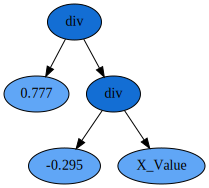

In [20]:
# Syntax Tree
dot_data = est._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

In [21]:
# Formula
print(est._program)

div(0.777, div(-0.295, X_Value))
